# Installation

To set up the python environment, we will use Anaconda (<a href="https://www.anaconda.com"> www.anaconda.com</a>). Click the link, find `Free download`, and follow the instructions.


Once installed, search for the app, which should be called something like **Anaconda-Navigator**. Once *Navigator* starts,  go to *Environments*, and *Search Packages*. Please check for the following packages:
- numpy
- scipy
- matplotlib
- notebook (jupyter notebook)
- numba
- pybind11

`pybind11-abi`  probably exists, but `pybind11` probably not. 

When in *Environments* of *Navigator*, please change the packages which you see from `installed` to `All` and than search again for `pybind11` and `numba`. If you find them, install them.

If they still don't show up, then you can issue the following in the command line:

`conda install -c conda-forge pybind11`


We will also need a text editor for python codes (in addition to jupyter notebooks). **Spyder** is part of Anaconda, and is very powerful editor. You can find it inside *Anaconda-Navigator*.

But other editors of your choice are equally good (for example *emacs* or *Aquamacs* or *vim* or *vi*)

Some examples to speed up the code will be given in C++ and fortran. 

It is not essential to have both installed, but you will learn more if you can set up the environment with a C++ and fortran compiler (such as `gcc` and `gfortran`), which can be combined with Python. For installation instructions, see the `Optional installation of C++` below. We will also show examples below.

We will test the installation with an excercise of plotting **Mandelbrot set.**

## Mandelbrot set

Wikipedia: The Mandelbrot set $M$ is defined by a family of complex quadratic polynomials $f(z) = z^2 + z_0$ where $z_0$ is a complex parameter. For each $z_0$, one considers the behavior of the sequence $(f(0), f(f(0)), f(f(f(0))), Â· Â· Â·)$ obtained by iterating $f(z)$ starting at $z=0$, which either escapes to infinity or stays
within a disk of som finite radius. The *Mandelbrot set* is defined as the set of points $z_0$, such that the above sequence does not escape to infinity.

More concretely, the sequence is : $(z_0,z_0^2+z_0,z_0^4+2 z_0^3+z_0^2+z_0,...)$.

For large $z_0$ it behaves as $z_0^{2n}$ and clearly diverges at large $n$. Consequently, large $z_0$ is not part of the set. 

For small $z_0$, it is of the order of $z_0+O(z_0^2)$, and is small when $z_0$ is small. Such $z_0$ are part of the set.

To determine that certain $z_0$ is not part of the *Mandelbrot set*, we check if $|f(f(f(....)))|>2$. 
This treshold is sufficient, because the point with the largest magnitude that is still in the set is -2. Indeed, if we set $z_0=-2$, we see that $f(f(0))=(-2)^2-2=2$ and $f(f(f(0)))=2^2-2=2$, and for any number of itterations the sequence remains equal to $2$. Such sequence remains finite, and by definition $z_0=-2$ is part of the set, and $f(f(f(...)))=2$ might lead to finite sequence. 

For any other point $z_0\ne -2$ and $|z_0|=2$, we can show that once $|f(f(f(...)))|$ becomes $2$, it will lead to diverging sequence. For example, for $z_0=1$ we have $f(f(0))=2$ and $f(f(f(0)))=5$, and clearly grows.

We will make density plot, with $Re(z_0)$ on $x$-axis, and $Im(z_0)$ on $y$-axis, and color will denote how long it took for the sequence to have absolute value equal to 2. The mandelbrot set will have one color, and all other colors 



In [74]:
from numpy import * # because arrays are defined in numpy

def Mand(z0, max_steps):
    z = 0j  # no need to specify type.  
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps

def Mandelbrot(ext, Nxy, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    data = zeros((Nxy,Nxy)) # initialize a 2D dynamic array
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
    return data
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

In [75]:
data = Mandelbrot([-2,1,-1,1], 500, 1000)

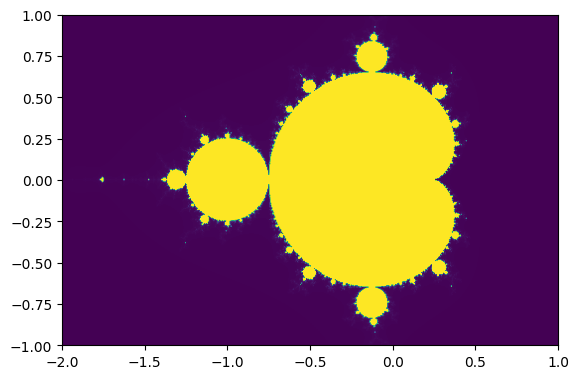

In [76]:
from pylab import *    # plotting library
%matplotlib inline

ext=[-2,1,-1,1]
# pylab's function for displaying 2D image

imshow(data.T,origin='lower',extent=ext);

In [77]:
help(imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'
    Display data as an image, i.e., on a 2D regular raster.

    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image, set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.

    The nu

This resolution is somewhat low, and we would like to increase $N_{xy}$ to 1000. But this would make the code 4-times slower. The code is already time consuming.
Let's time it. 

For that we need to include *time* and use *time.time()* routine.

In [78]:
import time            # timeing
t0 = time.time()
data = Mandelbrot([-2,1,-1,1], 1000, 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  63.53045463562012 s


We can speed up the code with package **numba**: <a href="https://numba.pydata.org">https://numba.pydata.org</a>.

In the simplest case, we just add two lines of code: 

`from numba import njit`

`@njit`


Limitations of Numba:
- Numba only accelerates code that uses scalars or (N-dimensional) arrays. You canâ€™t use built-in types like `list` or `dict` or your own custom classes.
- You canâ€™t allocate new arrays in accelerated code.
- You canâ€™t use recursion.
Most of those limitations are removed if using Cython.

Numba has been getting a lot better, even just over the past few months (e.g., they recently added support for generating random numbers).


In [79]:
from numpy import * # because arrays are defined in numpy
from numba import njit  # This is the new line with numba

@njit   # this is an alias for @jit(nopython=True)
def Mand(z0, max_steps):
    z = 0j  # no need to specify type. 
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps

@njit
def Mandelbrot2(ext, Nxy, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    data = zeros((Nxy,Nxy)) # initialize a 2D dynamic array
    for i in range(Nxy):
        for j in range(Nxy):
            x = ext[0] + (ext[1]-ext[0])*i/(Nxy-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Nxy-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
    return data
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

In [80]:
import time            # timeing
t0 = time.time()
data = Mandelbrot2(array([-2,1,-1,1]), 1000, 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  2.754258632659912 s


This is substantial speedup of order of 20, considering a small modification required.

We can slightly improve the code by making the outer loop over i parallel, and by allocating array for data outside the optimized routine.

- We will allocate array data outside `Mandelbrot` function
- We will change `@njit` to `@njit(parallel=True)` and use `prange` instead of `range` for loop over j. Namely, if we don't change `range` to `prange` both loops will be attempted to be parallelized, which leads to nested parallelization, which either fails or is very innefficient.


The example code is:

In [81]:
from numpy import * # because arrays are defined in numpy
from numba import njit  # This is the new line with numba
from numba import prange

@njit   # this is an alias for @jit(nopython=True)
def Mand(z0, max_steps):
    z = 0j  # no need to specify type. 
    # To initialize to complex number, just assign 0j==i*0
    for itr in range(max_steps):
        if abs(z)>2:
            return itr
        z = z*z + z0
    return max_steps

@njit(parallel=True)
def Mandelbrot3(data, ext, max_steps):
    """
    ext[4]    -- array of 4 values [min_x,max_x,min_y,max_y]
    Nxy       -- int number of points in x and y direction
    max_steps -- how many steps we will try at most before we conclude the point is in the set
    """
    Nx,Ny = shape(data) # 2D array should be already allocated we get its size
    for i in range(Nx):
        for j in prange(Ny):    # note that we used prange instead of range.
                                # this switches off parallelization of this loop, so that
                                # only the outside loop over i is parallelized.
            x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.)
            y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.)
            # creating complex number of the fly
            data[i,j] = Mand(x + y*1j, max_steps)  
# data now contains integers. 
# MandelbrotSet has value 1000, and points not in the set have value <1000.

In [82]:
import time            # timeing
data = zeros((1000,1000))
t0 = time.time()
Mandelbrot3(data, array([-2,1,-1,1]), 1000)
t1 = time.time()
print ('clock time: ',t1-t0,'s')

clock time:  2.6813347339630127 s


With this modification, we get speedup of the order of 50.
Note that pure C++ code with OpenMP could gives us speedup of the order of 200, i.e., extra factor of 4 on MAC with 8 cores.


Finally, let us improve the plot a bit. We will transform the data to plot `-logarithm` of the data (density logplot), so that *Mandelbrot Set* has the smallest value (appears black), and borders are more apparent.

We will use different color scheme, for example `hot` color scheme from `matplotlib.cm`.

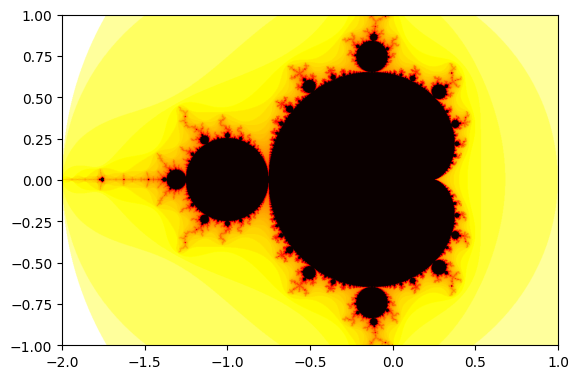

In [83]:
import matplotlib.cm as cm

imshow(-log(data.T), extent=[-2,1,-1,1], cmap=cm.hot, origin='lower');  

# Optional: Using C++ with `pybind11` to speed up the code 

To make the code as fast as in compiler languages (C++ or fortran), we can rewrite the slow part directly in C++, and use pybind11 to produce a python module from C++ code.

## Optional installation of C++. These instructions are MAC specific.

- Install `Xcode` package from `App Store`
- Install "Command Line Tools" parts of `Xcode`. You can check if "Command Line Tools" are already installed by issuing the following in the`terminal`:

  `xcode-select --print-path`.

  If you get no output, then issue the following command in your `terminal`:

  `xcode-select â€”-install`

  Xcode contains `C/C++` compiler (`gcc/g++`). Check if installation was successful by issuing in `terminal`:

  `gcc --version`
  
  It is just a link to apples native Clang. It contains `make` utility.
  Xcode also contains many libraries, for example, BLAS and LAPACK libraries, which can be linked by adding linker option: `-framework Accelerate`.


`Xcode` also includes `make` for compilation, which we will often use.

For more information see (https://developer.apple.com/accelerate/)

## Optional installation of openMP C++ and gfortran. These instructions are MAC specific.

Apple has explicitly disabled multicore `OpenMP` support in compilers that they ship in Xcode. Apple also does not automatically install `gnu` compilers (such as `gnu-c==gcc` and `gnu-c++==g++`). Instead `gcc` and `g++` point to appleâ€™s own `Clang` compiler in which `OpenMP` support was dissabled. Moreover, `Clang` does not include `fortran` compiler, such as gnu `gfortran`. More details on this issue are available here https://mac.r-project.org/openmp/.

### Install Homebrew 
To be on the safe side, and not change the native `gcc` of our system, we will install original `gnu` compilers through project called `homebrew`. The official webpage of `homebrew` project is at http://brew.sh .

As explained in the `homebrew` website, we need to paste the following into the terminal prompt:

`/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"`


and follow the instructions.

After installing homebrew, you can check for any issues with the install by typing

`brew doctor`



*On some OSX versions you may run into file permission issues with OSXâ€™s SIP process. If you see permission issues that does not allow you to install homebrew, you might need to change ownership on the homebrew directory by typing:*
`sudo chown -R $(whoami):admin /usr/local`


### Install gnu-gcc and gfortran

Now that `homebrew` is installed, we can install `gcc` and `gfrortran`

First check that gcc package exists, you can type in the Terminal prompt

`brew search gcc`

To actually install gcc and gfortran, please type:

`brew install gcc`

If you arelady installed gcc before, but is not up-to-date, you can type:

`brew reinstall gcc`

**Warning: the installation of gcc will take a lot of time.**

Check installation after it is complete:

`gcc-13 --version`

`gfortran --version`

### (Optional) Install gnuplot and gsl

Simple plotting program, alternative to matplotlib:

`brew install gnuplot`

Gnu scientific library, which contains many numeric algorithms:

`brew install gsl`


## C++ and fortran with openMP implementation of the same algorithm

We want to test the maximum speed achievable on our computers using C++ and Fortran compilers, which allow OpenMP parallelization. We need a C++ implementation, and we will compile it with the `gnu` compilers we just installed through the `Homebrew` package.


We will write the code in jupyter (not native editor for C++). 
The C++ code below is saved through python special command `%% <filename>`. This will save the content of the cell into a file with name `<filename>`. 

In [84]:
%%file mandc.cc

#include <iostream> // for printing to stdout
#include <complex>  // for complex numbers
#include <ctime>    // for measuring time
#include <vector>   // for using array/vector
#include <omp.h>    // openMP and measuing time with openMP
using namespace std;// everything from standard template library is available withouth prefix std
// std::cout and std::endl can be called cout, endl, etc...

int Mandelb(const complex<double>& z0, int max_steps)
{
  complex<double> z=0; // specify type where we start using it. (still need to specify type not like python with auto-typing)
  for (int i=0; i<max_steps; i++){ // specify int type inside the loop, so it is local to the loop. useful for reducing bugs.
    if (abs(z)>2.) return i;
    z = z*z + z0;
  }
  return max_steps;
}

int main()
{
  const int Nx = 1000; // constants are named cost rather than parameter
  const int Ny = 1000;
  int max_steps = 1000; // allowed to change later.
  double ext[]={-2,1,-1,1}; // this specifies fixed array of four numbers and initializes it.

  //double mand[Nx][Ny];
  
  vector<int> mand(Nx*Ny);  // allocating one dimensional array (vector) of size Nx*Ny
  // multidimensional dynamic arrays are not standard in C++. One can use pointers to allocate/deallocate memory,
  // and write one's own class interface for that. Or one has to use extension of C++ (blitz++ is excellent).
  // Unfortunately the standard C++ still does not support standard class for that.
  clock_t startTimec = clock();  // cpu time at the start 
  double start = omp_get_wtime(); // wall time at the start

  #pragma omp parallel for
  for (int i=0; i<Nx; i++){
    for (int j=0; j<Ny; j++){
      double x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.); // x in the interval ext[0]...ext[1]
      double y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.); // y in the interval ext[2]...ext[3]
      mand[i*Ny+j] = Mandelb(complex<double>(x,y), max_steps); // storing values in 2D array using 1D array
      //mand[i*Ny+j] = Mandelb(x+y*complex<double>(0.,1.), max_steps); // storing values in 2D array using 1D array
    }
  }

  clock_t endTimec = clock();
  double diffc = double(endTimec-startTimec)/CLOCKS_PER_SEC; // how to get seconds from cpu time
  double diff = omp_get_wtime()-start;                       // openMP time is already in seconds
  
  clog<<"clock time : "<<diffc<<"s"<<" with wall time="<<diff<<"s "<<endl; // printout of time
  for (int i=0; i<Nx; i++){
    for (int j=0; j<Ny; j++){
      double x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.);
      double y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.);
      cout<<x<<" "<<y<<" "<< 1./mand[i*Ny+j] << endl; // prinout of mandelbrot set
    }
  }
}


Overwriting mandc.cc


Next we check that the file now exists in the working directory, where our jupyter notebook is located. This can be achieved by the syntax 

`!{<system command>}`

In [85]:
!(dir -l mandc.cc)

 Volume in drive C is Windows
 Volume Serial Number is BA0F-D20C

 Directory of c:\Users\milkk\Computational Physics


 Directory of c:\Users\milkk\Computational Physics

09/29/2024  08:11 PM             2,718 mandc.cc
               1 File(s)          2,718 bytes
               0 Dir(s)  42,089,000,960 bytes free


Next we compile it with proper compilation.

In [86]:
cmd="g++.exe -Wall -Wextra -g3 -fopenmp -Ofast -o mandc mandc.cc"

!(cmd)

^C


And finally execute it

In [87]:
!( mandc > mand.dat)

^C


clock time : 0.301s with wall time=0.294s 


Note the timing: 0.15s is needed on this computer to produced the plot.

Compare this to pure Python implementation (12s), simple numba (0.8s) and improved numba (0.35s). Native code with multicore parallelization is only around 2.3-times faster. In most algorithms the native C++ code will probably do better. But in case of `mandelbrot` set, `numba` is already doing a fantastic job.

We also want to see if the data is correct. 
The data contains three columns, Re(z0),Im(z0),Nsteps. We can display the result using matplotlib

In [88]:
def PlotFile(filename):
    import numpy as np
    import pylab as pl
    from matplotlib.colors import LogNorm

    X,Y,Z = np.loadtxt(filename,unpack=True)
    ext=[X[0],X[-1],Y[0],Y[-1]]
    N = int(np.sqrt(len(Z)))
    dat = Z.reshape(N,N)
    print(ext)
    pl.imshow(dat.T,extent=ext,cmap=cm.hot,norm=LogNorm())   # pylab's function for displaying 2D image
  

In [ ]:
if abs(x) < how_small:
    x_n=1
    KN=0
    for m in range(1000)
    dk = 1/(n+m+1)*(x_n/z)
    KN ++ dkxn +=x

[np.float64(-2.0), np.float64(1.0), np.float64(-1.0), np.float64(1.0)]


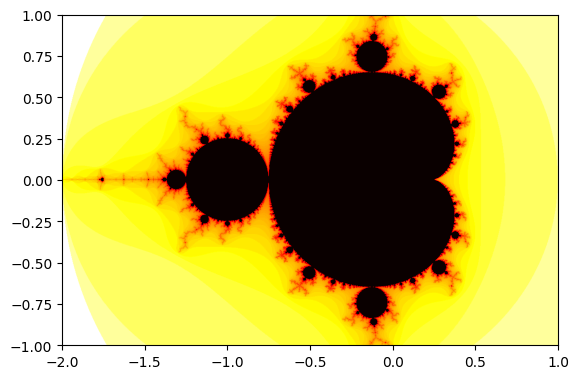

In [89]:
PlotFile('mand.dat')

We want to check how fast is fortran implementation. There are cases where fortran tends to be faster because of aliasing problem. Namely, fortran and C++ handle memory references very differently. In fortran we don't have pointers, and hence two variables can not point to the same location in memory. In C++ it is always possible to have multiple pointers to point to the same location in memory, making optimization of the code more challenging.
Newertheless, in recent architectures it seems C++ is reaching almost the same speed as fortran (at least gnu fortran).


In [46]:
%%file mandf.f90

INTEGER Function Mandelb(z0, max_steps)
  IMPLICIT NONE ! Every variable needs to be declared. It is very prudent to use that.
  COMPLEX*16, intent(in) :: z0
  INTEGER, intent(in)    :: max_steps
  ! locals
  COMPLEX*16 :: z
  INTEGER    :: i
  z=0.
  do i=1,max_steps
     if (abs(z)>2.) then ! |f(z)|>2 we know it will explode for large n, hence not part of the set.
        Mandelb = i-1      ! return how many iterations it took to know this is not part of the set.
        return 
     end if
     z = z*z + z0
  end do
  Mandelb = max_steps
  return
END Function Mandelb

program mand
  use omp_lib
  IMPLICIT NONE
  ! external function
  INTEGER :: Mandelb ! Need to declare the external function
  ! locals
  INTEGER :: i, j
  REAL*8  :: x, y
  COMPLEX*16  :: z0
  INTEGER, parameter :: Nx = 1000
  INTEGER, parameter :: Ny = 1000
  INTEGER, parameter :: max_steps = 1000
  REAL*8  :: ext(4) = (/-2., 1., -1., 1./) ! The limits of plotting
  REAL*8  :: mande(Nx,Ny)
  REAL*8  :: start, finish, startw, finishw
  
  call cpu_time(start)
  startw  = OMP_get_wtime()
  
  !$OMP PARALLEL DO  PRIVATE(j,x,y,z0)
  do i=1,Nx
     do j=1,Ny
        x = ext(1) + (ext(2)-ext(1))*(i-1.)/(Nx-1.) ! x \in [ext(1)...ext(2)]
        y = ext(3) + (ext(4)-ext(3))*(j-1.)/(Ny-1.) ! y \in [ext(3)...ext(4)]
        z0 = dcmplx(x,y)
        mande(i,j) = Mandelb(z0, max_steps)
     enddo
  enddo
  !$OMP END PARALLEL DO

  finishw = OMP_get_wtime()
  call cpu_time(finish)
  WRITE(0, '("clock time : ",f6.3,"s  wall time=",f6.3,"s")') finish-start, finishw-startw

  do i=1,Nx
     do j=1,Ny
        x = ext(1) + (ext(2)-ext(1))*(i-1.)/(Nx-1.)
        y = ext(3) + (ext(4)-ext(3))*(j-1.)/(Ny-1.)
        print *, x, y, 1./mande(i,j)
     enddo
  enddo
end program mand

Writing mandf.f90


In [58]:
cmd="gfortran -fopenmp -Ofast -o mandf mandf.f90"

!(cmd)

^C


In [60]:
!( mandf > mandf.dat)

This is similar, but slightly slower than C++ implementation above. It seems gnu compilers have extremely efficient optimization for C++ and maybe a bit less efficient for fortran. Intel fortran tends to be a bit faster than any other C and C++ compiler.

In [61]:
PlotFile('mandf.dat')

C:\Users\milkk\AppData\Local\Temp\ipykernel_46500\877105265.py:6: UserWarning: loadtxt: input contained no data: "mandf.dat"
  X,Y,Z = np.loadtxt(filename,unpack=True)


ValueError: not enough values to unpack (expected 3, got 0)

## Return to `pybind11` to speed up the code 

The C++ code, which can produce Python module, is written below. The function `mand` is written in conventional C++ language. For storage, we use type `py::array_t<double>`, which can convert any numpy arrays to a simple C++ container, that can be accessed conventionally.

We do that in the very top of the function, where we extract proper type from `py::array_t<double>`

`auto dat = data.mutable_unchecked<2>();`


The `dat` object behaves as normal 2D array, which can be accessed via `dat(j,i)=...`. 

To have access to these Python types, we need to include a few `pybind11` header files:

`#include "pybind11/pybind11.h"`<br>
`#include "pybind11/numpy.h"`<br>
`#include "pybind11/stl.h"`

The crucial difference between normal C++ code or Python module is that the `main()` function is replaced by `PYBIND11_MODULE(imanc,m)`, which creates shared library that Python recognizes as module, rather than executable. Here, the first argument has to match the name of the file compiled file (`imanc.cc` and `imanc`). The second argument creates object with name `m`, which can than be filled with functions or classes that are exposed to Python. We just add our function `mand` to it : `m.def("mand", &mand);`. The string `"mand"` gives name to this function in Python, which could in general be different, and `&mand` takes the pointer to existing C++ routine and binds it to Python module. The line `m.doc() = "..."` adds some documentation to the module as seen from Python.


The C++ code below is saved through python special command `%% <filename>`. This will save the content of the cell into a file with name `<filename>`. 

In [62]:
%%file imanc.cc   

#include "pybind11/pybind11.h"
#include "pybind11/numpy.h"
#include "pybind11/stl.h"
#include <cstdint>

namespace py = pybind11;
using namespace std;

void mand(py::array_t<double>& data, int Nx, int Ny, int max_steps, const vector<int>& ext)
{
  auto dat = data.mutable_unchecked<2>();
  #pragma omp parallel for
  for (int i=0; i<Nx; i++){
    for (int j=0; j<Ny; j++){
      dat(j,i) = max_steps;
      double x = ext[0] + (ext[1]-ext[0])*i/(Nx-1.);
      double y = ext[2] + (ext[3]-ext[2])*j/(Ny-1.);
      complex<double> z0(x,y);
      complex<double> z=0;
      for (int itr=0; itr<max_steps; itr++){
        if (norm(z)>4.){
          dat(j,i) = itr;
          break;
        }
        z = z*z + z0;
      }
    }
  }
}

PYBIND11_MODULE(imanc,m){
  m.doc() = "pybind11 wrap for mandelbrot";
  m.def("mand", &mand);
}

Writing imanc.cc


Next we check that the file now exists in the working directory, where our jupyter notebook is located. This can be achieved by the syntax 

`!{<system command>}`

In [64]:
!(dir -l imanc.cc)

 Volume in drive C is Windows
 Volume Serial Number is BA0F-D20C

 Directory of c:\Users\milkk\Computational Physics


 Directory of c:\Users\milkk\Computational Physics

09/19/2024  11:24 AM               863 imanc.cc
               1 File(s)            863 bytes
               0 Dir(s)  51,201,691,648 bytes free


We should be able to achieve the same effect by starting the python cell by

`%%bash`

on linux/mac
or 

`%%cmd`

on windows

Next we need to compile C++ code to create proper shared libray, which Python recognizes. This string is platform dependent, and in its current form is most appropriate for MAC. It needs some modification on other platforms. Please read the <a href="https://pybind11.readthedocs.io/en/stable/basics.html#compiling-the-test-cases"> documentation</a> and <a href="https://pybind11.readthedocs.io/en/stable/compiling.html">instructions</a> to modify the compile line.

We will again create a long string, which is a line that is normally written in comand line, and we will than execute it on the system.

As said, the complile line is system dependend, and will most likely need modification. Here is the explanation of the command:

- `g++-12` is tha name of the C++ compiler on the sytstem. Most likely needs to be changed to your existsing C++ compiler.

- `python3 -m pybind11 --includes` is line that can be executed in command line (try it) and should give the location of `pybind11` include files. Each computer will have these files at slightly different location, but this command should work in most systems.

- `-undefined dynamic_lookup` is something MAC specific. Withouth this flag, the compiler will issue errors of missing symbols in the module. In other operating systems should not be needed.

- `-O3` switches on agrresive optimization.

- `-fopenmp` allows the code to be parallelized by openMP. Namely the code above has a line `#pragma omp parallel for`, which parallelizes the first loop over i, provided that we also add this flag during compilation.

- `shared` tells the compiler that we are producing shared library

- `-std=c++11` forces compiler to use C++ 2011 standard. We could use later standard, but not earlier.

- `-fPIC` makes code position independent, which is required for shared library

- `imanc.cc` is the name of our file that is being compiled.

- `-o imanc.so` says that the output file will be called `imanc.so`. The Python module is thus named `imanc`.


In [73]:
#cmd="g++ `python -m pybind11 --includes` -undefined dynamic_lookup -O3 -shared -std=c++11 -fPIC imanc.cc -o imanc.so"
cmd="g++.exe -fopenmp -Wall -Wextra -g3  -IC:\\Users\\milkk\\Computational Physics\\.venv\\Lib\\site-packages\\pybind11\\include -O3  -undefined dynamic_lookup -shared -std=c++11 -fPIC imanc.cc -o imanc.so"

!(cmd)

^C


Finally, we import this generated module `imanc` and use the exposed function `mand` as `imanc.mand()`, which requires several arguments (see C++ code `mand` to understand the arguments). The arguments are `data, Nx, Ny, max_steps, ext`.

In [70]:
import imanc  # We now import pybind11 module, produced with C++ code

data3 = ones((1000,1000))

t0 = time.time()
imanc.mand(data3, 1000, 1000, 1000, [-2,1,-1,1])
t1 = time.time()

print('pybind11: walltime: ', t1-t0)

ModuleNotFoundError: No module named 'imanc'

The walltime is extremely close to native C++ speed, and should be around 150 - 200 times shorter than pure python code above. This is close to the optimal performance of modern computers. 

On some computers anaconda seems to not yet properly take advantage of Python modules produced by `pybind11`. In this case you might want to check the speed by running python code in the terminal. 

Finally we replot the data.

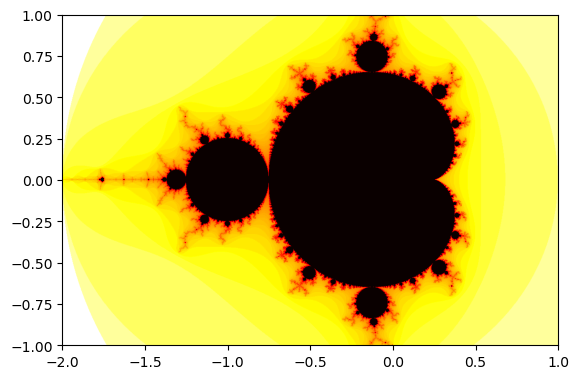

In [25]:
import matplotlib.cm as cm

imshow(-log(data3), extent=ext, cmap=cm.hot)  

## `f2py` as the alternative to `pybind11`

Another alternative to speed up the code is to use `f2py`, which can use standard `Fortran` (legacy) code and produce a `Python` module. Most of the `SciPy` library is produced using this tool, so it is good to be aware of it.


`f2py` allows one to make fortran code a bit more user-fiendly through `!f2py` directives (see below). They apprear as comments in fortran compiler, but f2py understand them as additional directives.


In [26]:
%%file mandel.f90

!-----------------------------------------------------
! Produces Mandelbrot plot in the range [-ext[0]:ext[1]]x[ext[2]:ext[3]]
! It uses formula z = z*z + z0 iteratively until
! asb(z) gets bigger than 2 
! (deciding that z0 is not in mandelbrot)
! The value returned is 1/(#-iterations to escape)
!-----------------------------------------------------
SUBROUTINE Mandelb(data, ext, Nx, Ny, max_steps)
  IMPLICIT NONE ! Don't use any implicit names of variables!
  ! Function arguments
  REAL*8, intent(out) :: data(Nx,Ny)
  REAL*8, intent(in)  :: ext(4)              ! [xa,xb,ya,yb]
  INTEGER, intent(in) :: max_steps
  INTEGER, intent(in) :: Nx, Ny
  !f2py integer optional, intent(in)          :: max_steps=1000
  !  !f2py integer intent(hide), depend(data) :: Nx=shape(data,0)  ! it will be hidden automatically
  !  !f2py integer intent(hide), depend(data) :: Ny=shape(data,1)  ! it will be hidden automatically
  ! Local variables
  INTEGER    :: i, j, itt
  COMPLEX*16 :: z0, z
  REAL*8     :: x, y
  data(:,:) = max_steps
  !$OMP PARALLEL DO  PRIVATE(j,x,y,z0,z,itt)
  DO i=1,Nx
     DO j=1,Ny
        x = ext(1) + (ext(2)-ext(1))*(i-1.)/(Nx-1.)
        y = ext(3) + (ext(4)-ext(3))*(j-1.)/(Ny-1.)
        z0 = dcmplx(x,y)
        z=0
        DO itt=1,max_steps
           IF (abs(z)>2.) THEN
              data(i,j) = itt-1 !1./itt         ! result is number of iterations
              EXIT
           ENDIF
           z = z**2 + z0             ! f(z) = z**2+z0 -> z
        ENDDO
        !if (abs(z)<2) data(i,j) = max_steps
     ENDDO
  ENDDO
  !$OMP END PARALLEL DO
  RETURN
END SUBROUTINE Mandelb


Overwriting mandel.f90


In [27]:
!{f2py -c mandel.f90 --f90flags='-fopenmp' -m mandel}

/Users/haule/anaconda3/lib/python3.11/site-packages/numpy/f2py/f2py2e.py:719: VisibleDeprecationWarning: distutils has been deprecated since NumPy 1.26.xUse the Meson backend instead, or generate wrapperswithout -c and use a custom build script
  builder = build_backend(
running build
running config_cc
INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
INFO: unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
INFO: build_src
INFO: building extension "mandel" sources
INFO: f2py options: []
INFO: f2py:> /var/folders/j8/d9m3r0zx7j37l3ktfl_n1xw00000gn/T/tmpolfvlyhw/src.macosx-11.0-arm64-3.11/mandelmodule.c
creating /var/folders/j8/d9m3r0zx7j37l3ktfl_n1xw00000gn/T/tmpolfvlyhw/src.macosx-11.0-arm64-3.11
Reading fortran codes...
	Reading file 'mandel.f90' (format:free)
Post-processing...
	Block: mandel
			Block: mandelb
Applying post-processing hooks...
  character_backward_compatibilit

In [28]:
import mandel  # importing module created by f2py
import time

ext=[-2,1,-1,1]
Nx = Ny = 1000
max_steps = 1000
tc = time.process_time() # cpu time
tw = time.time()  # wall time
data = mandel.mandelb(ext,Nx,Ny)
print('# wall time : ', time.time()-tw, 's  clock time : ', time.process_time() - tc, 's')

# wall time :  0.21518993377685547 s  clock time :  0.9273019999999974 s


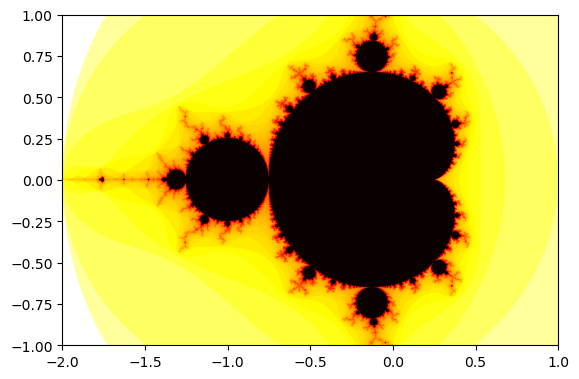

In [29]:
imshow(-log(data.T), extent=ext, cmap=cm.hot)  

## Popularity of programing languages

https://www.tiobe.com/tiobe-index/
